In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import integrate



# make recursive function


In [ ]:
def recursive(x, delta_t, D = 1, T_0 = 1):
    c = np.exp(-delta_t/T_0)
    s = np.sqrt((1-c**2)*D*T_0)
    next_x = c*x + s*np.random.normal()
    return next_x

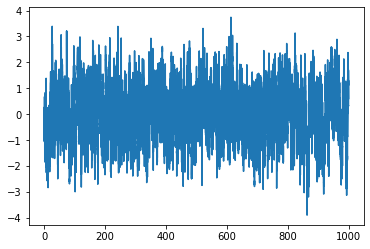

In [ ]:
delta_t = 0.01
t_arr = np.arange(0,1e5*delta_t,delta_t)
x = 0
x_arr = []
np.random.seed(10000)

for t in t_arr:
    x = recursive(x, delta_t)
    x_arr.append(x)

plt.plot(t_arr, x_arr)

# calculate variance

In [ ]:
print(np.std(x_arr)**2)
print('is compatible with expectation')

0.9945232458950878
is compatible with expectation


# autocorrelation

(0.0, 1000.0)

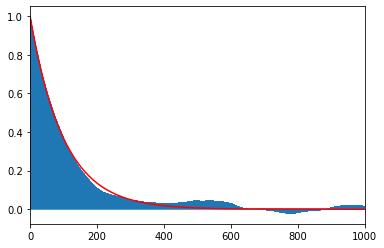

In [ ]:
def autocorrelation(t, D = 1, T_0 = 1):
    return D*T_0*np.exp(-np.abs(t/100)/T_0)

#plot_acf(np.array(x_arr),lags = 100,label = "From Data");
plt.acorr(x_arr, maxlags = 1000)
plt.plot(t_arr, autocorrelation(t_arr), 'r')

plt.xlim(0,1000)

# histograms

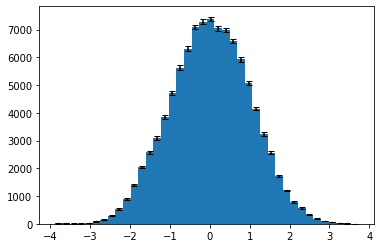

<ErrorbarContainer object of 3 artists>

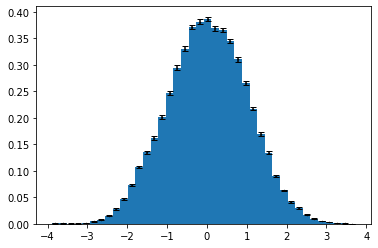

In [ ]:
#plot unnormalized histograms
n, bins, patches = plt.hist(x_arr, bins = 40)
error = np.sqrt(n)

#get centre position of the bins
bins = (bins[:-1] + bins[1:])/2
plt.errorbar(bins, n, yerr= error, fmt = 'k.', capsize = 3, ms = 1)
normalizing_factor = np.sum(n)*abs(bins[0] - bins[1])
plt.show()




n, bins, patches = plt.hist(x_arr, bins=40, density = True)
#get centre position of the bins
bins = (bins[:-1] + bins[1:])/2
norm_err = error/normalizing_factor


plt.errorbar(bins, n, yerr= norm_err, fmt = 'k.', capsize = 3, ms = 1)


# Fitting

3-4 parameter gaussian's are not suitable because we are not fitting the amplitude or the position on the x axis, including them remove more degrees of freedom from our fit

best fit parameters = [0.02798181 0.99022374]


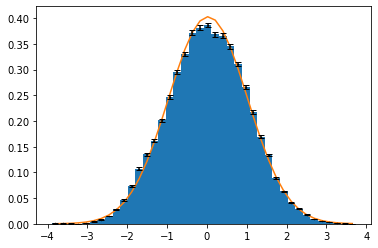

chisq = 436.69578282985765 ± 6.164414002968976
degrees of freedom = 38
chisq is about a factor of 10 too large


In [ ]:
def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((x-mu)/sigma)**2)



pOpt, pCov = curve_fit(gaussian, bins, n, p0 = [0,1], sigma = norm_err, absolute_sigma = True)

plt.hist(x_arr, bins=40, density = True)

plt.plot(bins, gaussian(bins, *pOpt))
plt.errorbar(bins, n, yerr= norm_err, fmt = 'k.', capsize = 3, ms = 1)
print(f"best fit parameters = {pOpt}")
plt.show()

norm_res = (n - gaussian(bins, *pOpt))/norm_err
chisq = np.sum(norm_res**2)
print(f"chisq = {chisq} ± {np.sqrt(len(bins) - 2)}")
print(f'degrees of freedom = {len(bins) - 2}')
print('chisq is about a factor of 10 too large')

# decimated time series

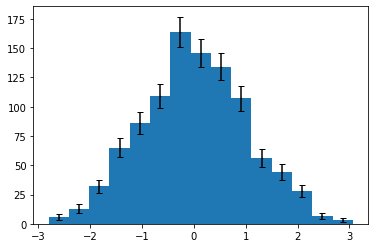

best fit parameters = [0.00878138 1.03328145]


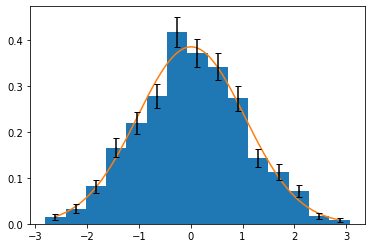

 chisq = 11.6 ± 5.1
degrees of freedom = 13
chisq is now in agreement with expected


(0.0, 100.0)

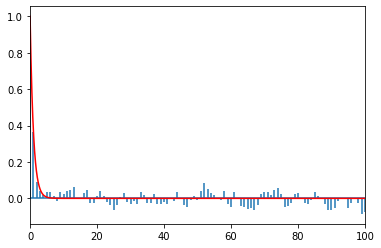

In [ ]:
#select every 100 time points since Tc = T_0 = 1s
decimated_series = x_arr[::100]
n2, bins2, patches2 = plt.hist(decimated_series, bins=15)

#get centre position of the bins
bins2 = (bins2[:-1] + bins2[1:])/2
error = np.sqrt(n2)
normalizing_factor = np.sum(n2)*abs(bins2[0] - bins2[1])
plt.errorbar(bins2, n2, yerr= error, fmt = 'k.', capsize = 3, ms = 1)
plt.show()


n2, bins2, patches2 = plt.hist(decimated_series, bins=15, density = True)
#get centre position of the bins
bins2 = (bins2[:-1] + bins2[1:])/2
norm_err2 = error/normalizing_factor

pOpt, pCov = curve_fit(gaussian, bins2, n2, p0 = [0,1], sigma = norm_err2, absolute_sigma = True)
dbins2 = np.linspace(min(bins2),max(bins2),200)
plt.plot(dbins2, gaussian(dbins2, *pOpt))

plt.errorbar(bins2, n2, yerr= norm_err2, fmt = 'k.', capsize = 3, ms = 1)

print(f"best fit parameters = {pOpt}")

plt.show()
norm_res2 = (n2 - gaussian(bins2, *pOpt))/norm_err2
chisq2 = np.sum(norm_res2**2)
print(f" chisq = {chisq2:.1f} ± {np.sqrt(2*(len(bins2)-2)):.1f}")
print(f"degrees of freedom = {len(bins2)-2}")
print('chisq is now in agreement with expected')


plt.acorr(decimated_series, maxlags = 100)
plt.plot(t_arr, autocorrelation(t_arr), 'r')

plt.xlim(0,100)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4bb45f9e-f9d7-4771-843d-2a6451217511' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>